In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('Train.csv') 
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
#Drop Unnecessary Columns
df.drop(columns=['ID'], inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [5]:
#Check for Missing Values
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [13]:
#Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace(".", "", regex=False)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,ReachedonTime_YN
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [14]:
# Rename the target column safely
df.rename(columns={"ReachedonTime_YN": "IsLate"}, inplace=True)  # OR use actual name from print

In [16]:
df['IsLate'] = df['IsLate'].map({1: 0, 0: 1})

EDA

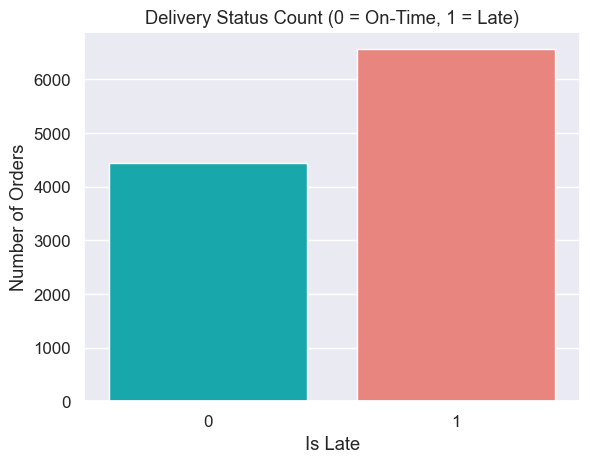

In [20]:
plt.style.use("ggplot")
sns.set(font_scale=1.1)
sns.countplot(x='IsLate', data=df, hue='IsLate', palette=['#00BFC4', '#F8766D'], legend=False)
plt.title('Delivery Status Count (0 = On-Time, 1 = Late)')
plt.xlabel('Is Late')
plt.ylabel('Number of Orders')
plt.show()



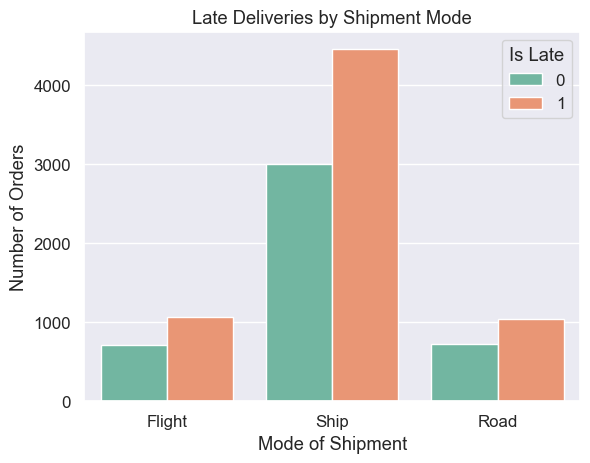

In [21]:
sns.countplot(x='Mode_of_Shipment', hue='IsLate', data=df, palette='Set2')
plt.title('Late Deliveries by Shipment Mode')
plt.xlabel('Mode of Shipment')
plt.ylabel('Number of Orders')
plt.legend(title='Is Late')
plt.show()

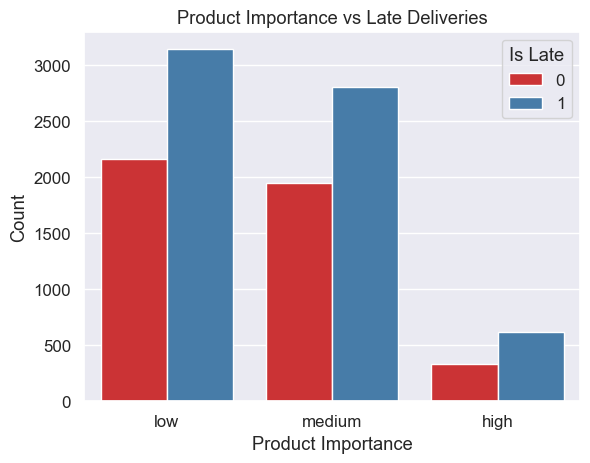

In [22]:
sns.countplot(x='Product_importance', hue='IsLate', data=df, palette='Set1')
plt.title('Product Importance vs Late Deliveries')
plt.xlabel('Product Importance')
plt.ylabel('Count')
plt.legend(title='Is Late')
plt.show()


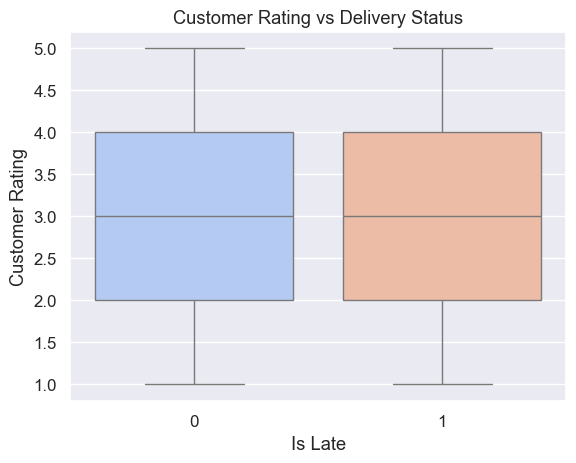

In [27]:
sns.boxplot(x='IsLate', y='Customer_rating', data=df, hue='IsLate', palette='coolwarm', dodge=False, legend=False)
plt.title('Customer Rating vs Delivery Status')
plt.xlabel('Is Late')
plt.ylabel('Customer Rating')
plt.show()


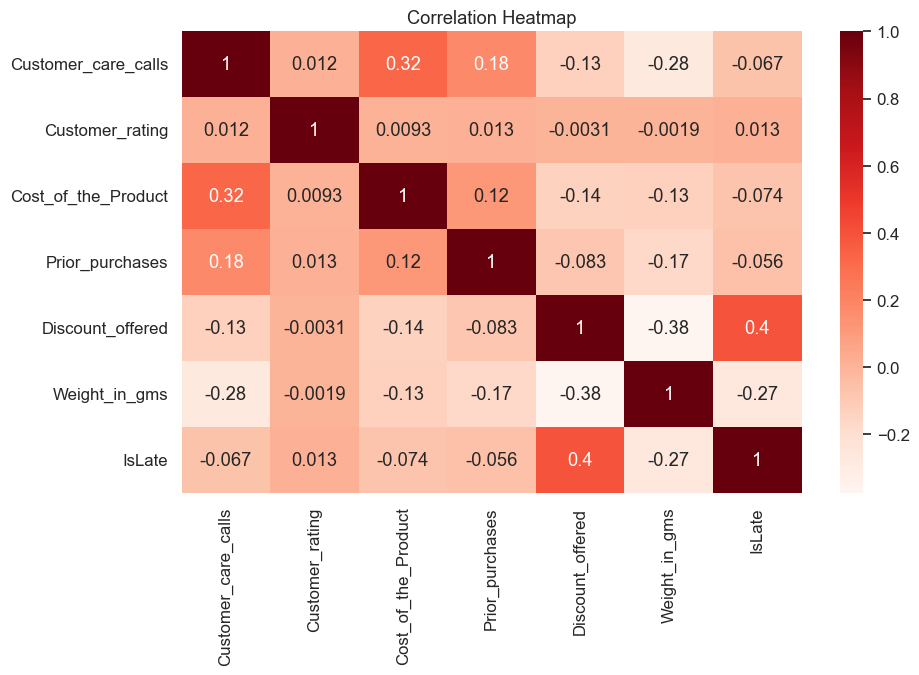

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Reds')
plt.title('Correlation Heatmap')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Features (drop irrelevant ones)
X = df.drop(['IsLate'], axis=1)

# Convert categorical variables to dummies
X = pd.get_dummies(X, drop_first=True)

# Target
y = df['IsLate']


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6627272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.68      0.62       895
           1       0.75      0.65      0.70      1305

    accuracy                           0.66      2200
   macro avg       0.66      0.67      0.66      2200
weighted avg       0.68      0.66      0.67      2200

Confusion Matrix:
 [[611 284]
 [458 847]]


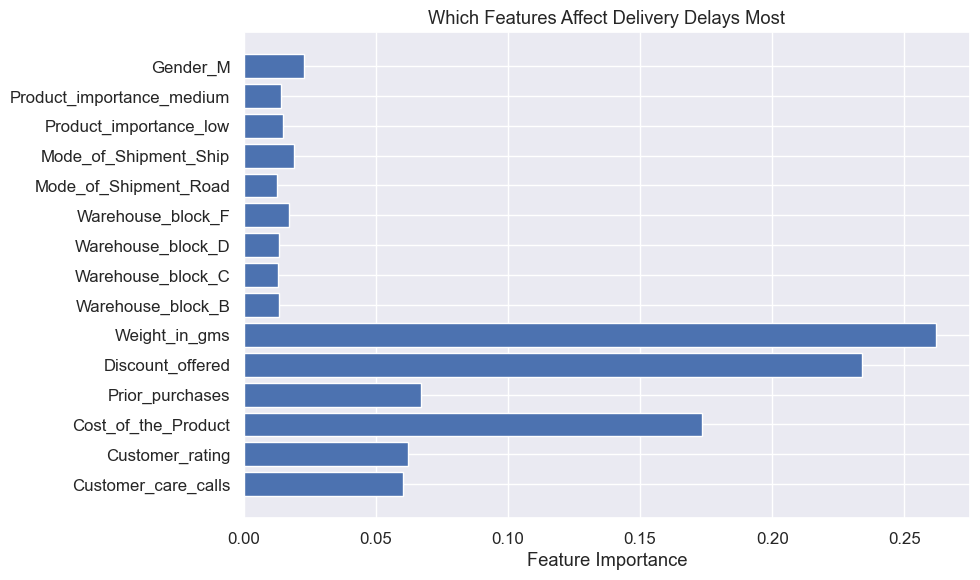

In [41]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Which Features Affect Delivery Delays Most")
plt.tight_layout()
plt.show()


In [42]:
# Predict probability for class 1 (Late)
y_prob = model.predict_proba(X_test)[:, 1]

# Combine predictions with original features
results_df = X_test.copy()
results_df['Actual_IsLate'] = y_test.values
results_df['Predicted_IsLate'] = y_pred
results_df['Predicted_Prob_Late'] = y_prob

# Optional: bring back readable fields like shipment mode
original_data = df.drop('IsLate', axis=1)
full_results = original_data.loc[results_df.index].reset_index(drop=True)
final_df = pd.concat([full_results, results_df[['Actual_IsLate', 'Predicted_IsLate', 'Predicted_Prob_Late']]], axis=1)

# Save to CSV
final_df.to_csv("delivery_predictions.csv", index=False)
